## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle as pk

import warnings
warnings.filterwarnings('ignore')

## Data collection and Data pre-processing

### About dataset: [heart data](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Attribute Information:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having  ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
#Loading dataset into Pandas Dataframe
heart_data = pd.read_csv('/content/heart_data.csv')

In [3]:
#Printing top five rows of the data
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#Number of rows and columns
heart_data.shape

(918, 12)

In [5]:
#Getting some information about data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
#Checking for missing values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#Statistical measures of the data
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#Checking the distribution of target values
heart_data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

1 --> Defective heart

0 --> Healthy heart

In [9]:
#Finding object datatype columns
heart_data.select_dtypes(['object']).columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

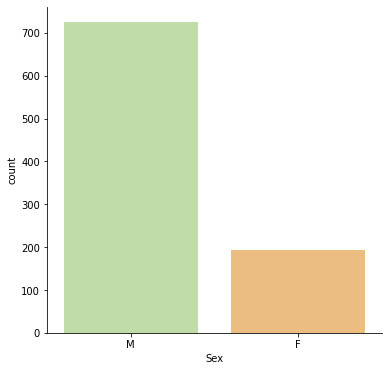

In [10]:
#Checking Distributions of sex columns
plot = plt.figure(figsize=(6,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.countplot(heart_data['Sex'],palette="Spectral_r")
plt.show()

In [11]:
#Replacing values in sex columns with zeros and ones
heart_data['Sex'].replace({'M':1, 'F':0}, inplace=True)

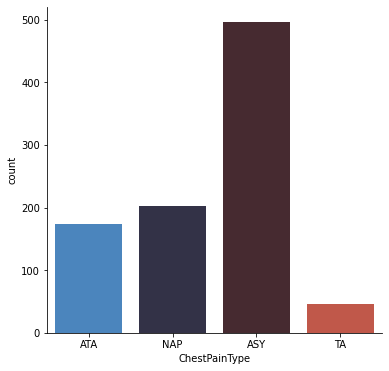

In [12]:
#Checking Distributions of column ChestPainType
plot = plt.figure(figsize=(6,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.countplot(heart_data['ChestPainType'], palette ="icefire")
plt.show()


In [13]:
#Replacing values in ChestPainType columns with numeric values
heart_data['ChestPainType'].replace({'ATA':0,'NAP':1,'ASY':2,'TA':3}, inplace=True)

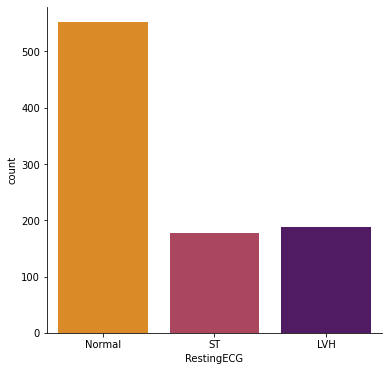

In [14]:
#Checking Distributions of column RestingECG
plot = plt.figure(figsize=(6,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.countplot(heart_data['RestingECG'], palette = "inferno_r")
plt.show()

In [15]:
#Replacing values in  RestingECG columns with numeric values
heart_data['RestingECG'].replace({'Normal':0,'ST':1,'LVH':2}, inplace=True)

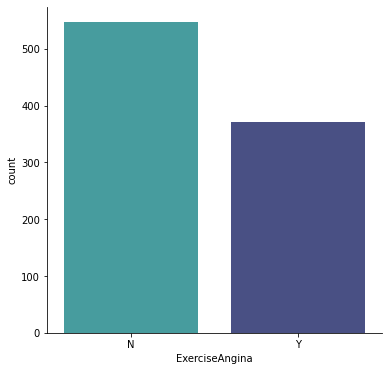

In [16]:
#Checking Distributions of column ExerciseAngina
plot = plt.figure(figsize=(6,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.countplot(heart_data['ExerciseAngina'], palette="mako_r")
plt.show()

In [17]:
#Replacing values in ExerciseAngina column with numeric values
heart_data['ExerciseAngina'].replace({'N':0,'Y':1}, inplace=True)

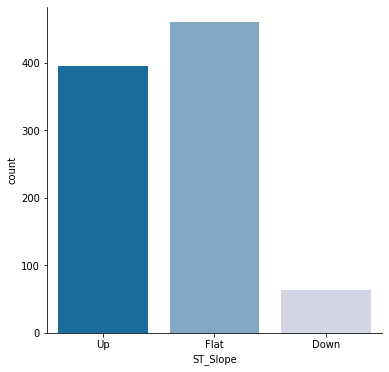

In [18]:
#Checking Distributions of column ST-Slope
plot = plt.figure(figsize=(6,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.countplot(heart_data['ST_Slope'], palette='PuBu_r')
plt.show()

In [19]:
#Replacing values in ST_Slope columns with numeric values
heart_data['ST_Slope'].replace({'Up':0,'Flat':1,'Down':2}, inplace=True)

## Splitting Features and Target

In [20]:
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

In [21]:
print(X)
print(y)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              0        140          289          0           0   
1     49    0              1        160          180          0           0   
2     37    1              0        130          283          0           1   
3     48    0              2        138          214          0           0   
4     54    1              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           0   
914   68    1              2        144          193          1           0   
915   57    1              2        130          131          0           0   
916   57    0              0        130          236          0           2   
917   38    1              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

## Data Standardization

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
#Saving variance and mean of standardization
std = np.sqrt(scaler.var_)
np.save('heart_disease_std.npy',std)
np.save('heart_disease_mean.npy', scaler.mean_)

## Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (734, 11) (184, 11)


In [26]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=2)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.859864
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 5}",0.842177
2,random_forest,{'n_estimators': 100},0.869388
3,svm,"{'C': 1, 'kernel': 'rbf'}",0.866667


In [27]:
# Using cross_val_score for gaining average accuracy
scores = cross_val_score(SVC(C=1, kernel="rbf", random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 86%


## Model Training

Support Vector Machine Classifier

In [28]:
model = SVC(C=1, kernel="rbf")

In [29]:
#Training the Support Vector Machine model with training data
model.fit(X_train, y_train)

SVC(C=1)

## Model Evaluation

Accuracy score

In [30]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

print('Accuracy score of training data :  {:.2f}% '.format(training_data_accuracy*100))

Accuracy score of training data :  89.78% 


In [31]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print("Accuracy score on test data : {:.2f}%  ".format(test_data_accuracy*100))

Accuracy score on test data : 88.04%  


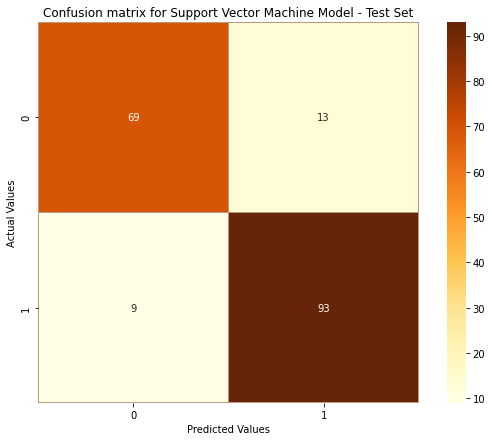

In [32]:
# Creating a confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="YlOrBr", fmt='g', square=True, linecolor='#BB9981', linewidths=0.01)
plt.title('Confusion matrix for Support Vector Machine Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Building Predictive System

In [33]:
#Creating function for heart disease prediction
def heart_disease_prediction(Age ,Sex ,ChestPainType ,RestingBP ,Cholesterol ,FastingBS ,RestingECG ,MaxHR ,ExerciseAngina ,Oldpeak ,ST_Slope):
  arguments = [Age ,Sex ,ChestPainType ,RestingBP ,Cholesterol ,FastingBS ,RestingECG ,MaxHR ,ExerciseAngina ,Oldpeak ,ST_Slope]
  for arg in arguments:
    if type(arg)=='int':
      arg = int(arg)
    else:
      arg = float(arg)
  x = [[Age ,Sex ,ChestPainType ,RestingBP ,Cholesterol ,FastingBS ,RestingECG ,MaxHR ,ExerciseAngina ,Oldpeak ,ST_Slope]]
  x = scaler.transform(x)
  return model.predict(x)


In [34]:
prediction = heart_disease_prediction(40,1,1,140,289,0,0,172,0,0,0)[0]
print(prediction)
if prediction:
   print('Oops! You  have heart disease.')
else:
  print("Great! You don't have heart disease.")

0
Great! You don't have heart disease.


## Saving trained model

In [35]:
#Saving trained model
filename = "heart_disease_prediction_model.pkl"
pk.dump(model, open(filename, "wb"))

In [36]:
#Loading trained model
log_model = pk.load(open(filename,"rb"))

#Loading scaled standard deviation and mean
std = np.load('heart_disease_std.npy')
mean = np.load('heart_disease_mean.npy')

In [37]:
#Creating function for heart disease prediction
def heart_disease_prediction(Age ,Sex ,ChestPainType ,RestingBP ,Cholesterol ,FastingBS ,RestingECG ,MaxHR ,ExerciseAngina ,Oldpeak ,ST_Slope):
  arguments = [Age ,Sex ,ChestPainType ,RestingBP ,Cholesterol ,FastingBS ,RestingECG ,MaxHR ,ExerciseAngina ,Oldpeak ,ST_Slope]
  for arg in arguments:
    if type(arg)=='int':
      arg = int(arg)
    else:
      arg = float(arg)
  x = [[Age ,Sex ,ChestPainType ,RestingBP ,Cholesterol ,FastingBS ,RestingECG ,MaxHR ,ExerciseAngina ,Oldpeak ,ST_Slope]]
  x = (x-mean)/std

  return log_model.predict(x)


In [38]:
prediction = heart_disease_prediction(40,1,1,140,289,0,0,172,0,0,0)[0]
print(prediction)
if prediction:
   print('Oops! You  have heart disease.')
else:
  print("Great! You don't have heart disease.")

0
Great! You don't have heart disease.


## ..........................THANK YOU.............................